# Gradient  Descent with Applications to Linear Regression

## Jade Gee

---
---

## Introduction

Gradient descent is an unconstrained optimization algorithm that finds the local minimum of a differentiable function. We use $$\min_{x\in\mathbb{R}^n} f(x),$$ where $x$ is a real valued $n$-dimensional vector that has no restrictions on its components' values; and $f(x): \mathbb{R}^n \to \mathbb{R}$ is a smooth, real valued function.

When developing a minimization algorithm that finds local minima, and occasionally global minima, we start a point, $x_k$ and evaluate it to see whether the function is decreasing or increasing at that point. Once we have this information, we can essentially take a "step" in the direction of the descent. This means that we will calculate the sign of $\nabla f(x^k)$ and then "step" in the opposite direction. This is what is known as the iterative update rule or gradient descent: 
$$x^{k+1} = x^k - \alpha \nabla f(x^k),$$ 
where $\alpha$ is the `step length` — the distance that we move to a new point, $x^{k+1}$, in the direction of the descent — also known as the `learning rate`.

For the purpose of this notebook, we will demonstrate this iterative optimization with the function

$$ f(x,y) = 5(x-2)^2 + 3y^2, $$

with the gradient of

$$
\begin{align}
\nabla f(x, y) $=
\begin{bmatrix}
10(x-2) \\
6y
\end{bmatrix}
\end{align}
$$

as an introductory example.

---

In order to begin, we will need to import the following libraries:
   
+ `Plots`
    - To plot our data for better visualization
    
+ `Random`
    - To create a random subset of our data
    
+ `CSV` and `DataFrames`
    - To import our data set as a data frame

In [1]:
using Plots
using Random
using CSV, DataFrames

In [2]:
# Function f(x,y)

f(x,y) = 5(x-2)^2 + 3*y^2

# Gradient of f(x,y)

∇f(x,y) = [10*(x-2), 6y]

∇f (generic function with 1 method)

The following code allows us to plot a three-dimensional (3-D) image of our function, $f(x,y)$.

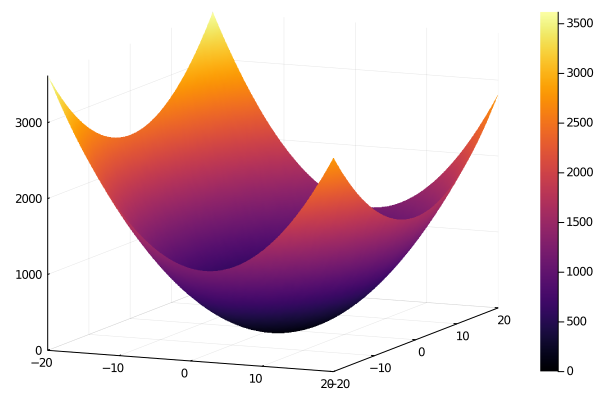

In [3]:
# 3-D Plot

x = -20:0.5:20
y = -20:0.5:20
plot(x, y, f, st = :surface)

For better visualization, we will utilize the contour plot of $f(x,y)$ instead of the 3-D plot above. The subsequent code will allow us to do that.

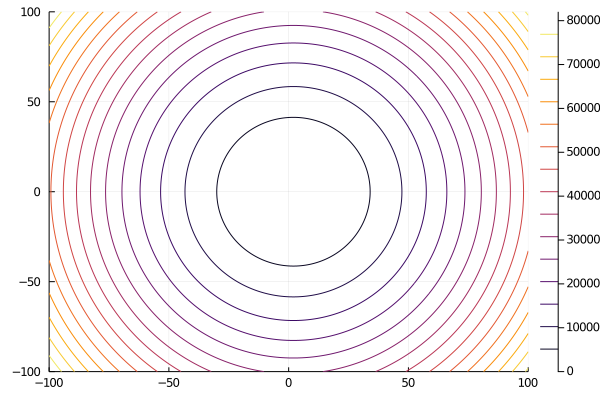

In [4]:
x = -100:0.5:100
y = -100:0.5:100
p = contour(x, y, f)
plot(p)

On our plot, we will select an initial position, $x_0$, from a random point within it. In this case, we will use the point $(-1, 3)$ as our initial position; then, we will iterate until our new point, $x_n$, reaches the minimum (center of our contour plot).

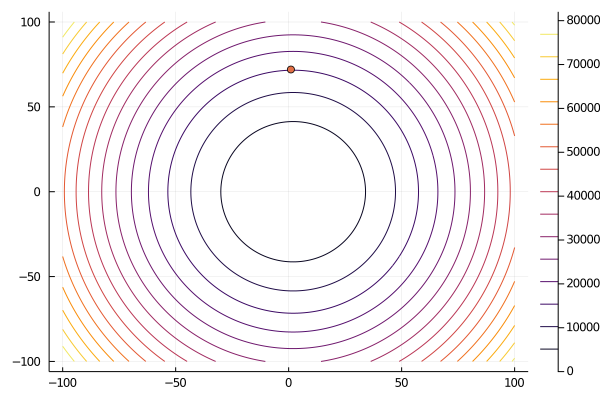

In [5]:
x0 = [-1, 3]

x = -100:0.5:100
y = -100:0.5:100
p = contour(x, y, f)
plot(p, legend = false)
scatter!([f(x0[1], x0[2])])

We will now take our first descent toward the minimum.

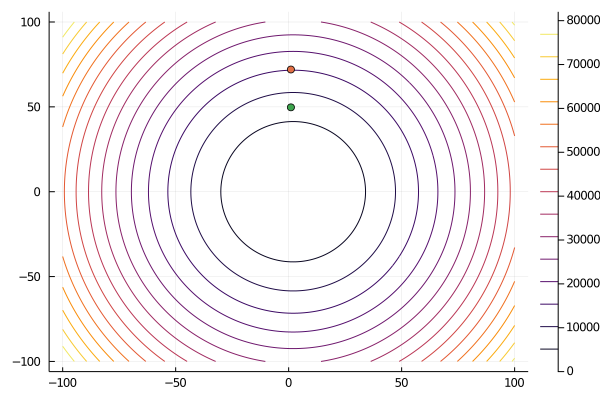

In [6]:
x1 = x0 = x0 - 0.02*∇f(x0[1], x0[2])
scatter!([f(x1[1], x1[2])])

As we have yet to reach the minimum, we will take another step in our descent toward the minimum.

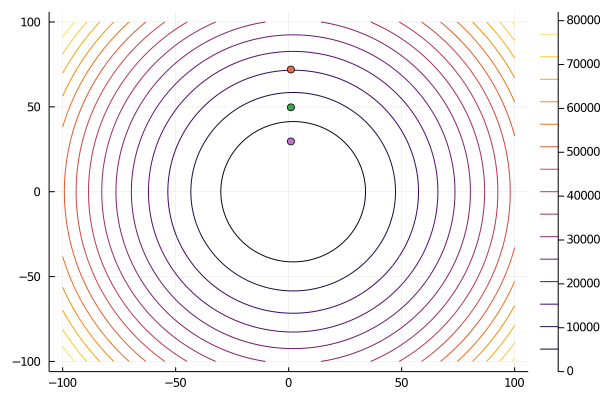

In [7]:
x2 = x1 - 0.2*∇f(x1[1], x1[2])
scatter!([f(x2[1], x2[2])])

Although our newest point, $(4.4, -0.528)$, is now in the innermost circle of the plot, we will verify that it has reached its minimum by attempting to take another step in the descent toward the minimum.

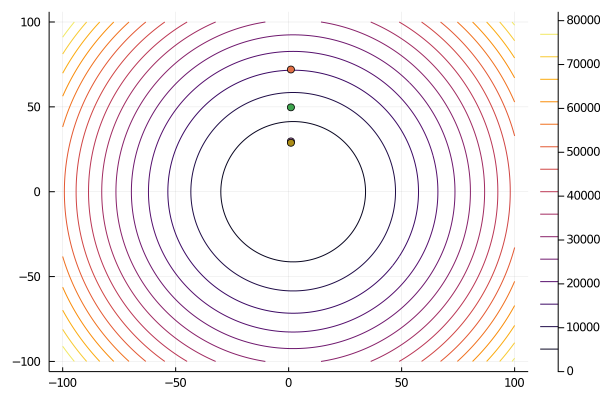

In [8]:
x3 = x2 - 0.2*∇f(x2[1], x2[2])
scatter!([f(x3[1], x3[2])])

As we can now see, our $x_2$ was not the minimum. Although the point appear to be very close to each other, newest value is $$x_3 = (-0.40000000000000036, 0.10560000000000003)$$

This example serves as a visual depicting, step-by-step, of how Gradient Descent is executed. As such, we will implement this algorithm in the following section.

---
---

## Applications to Linear Regression

As stated previously, Gradient Descent takes iterative steps in the direction of descent toward the minimum as depicted below

![Gradient Descent Example](GD.jpeg)

This algorithm minimizes a function by following the gradients of a cost function, in our case, the Mean Squared Error function, `MSE(w, b)`. To implement this, we must first gather the data and store the subset that we will be using into our x and y variables.

---

### Gather the data

From the data set, `Advertising.csv`, we will be focusing on the following two columns:

+ `sales`: the total ad sales in USD

+ `newspaper`: the amount of spending on newspaper ads in USD


In [9]:
data = CSV.read("Advertising.csv", DataFrame)

,Column1,TV,radio,newspaper,sales
,Int64,Float64,Float64,Float64,Float64
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2
7,7,57.5,32.8,23.5,11.8
8,8,120.2,19.6,11.6,13.2
9,9,8.6,2.1,1.0,4.8


In [10]:
x_data =  data.newspaper
y_data = data.sales

data_tuples = [x for x in zip(x_data, y_data)]

200-element Array{Tuple{Float64,Float64},1}:
 (69.2, 22.1)
 (45.1, 10.4)
 (69.3, 9.3)
 (58.5, 18.5)
 (58.4, 12.9)
 (75.0, 7.2)
 (23.5, 11.8)
 (11.6, 13.2)
 (1.0, 4.8)
 (21.2, 10.6)
 (24.2, 8.6)
 (4.0, 17.4)
 (65.9, 9.2)
 ⋮
 (3.7, 15.9)
 (23.4, 6.7)
 (5.8, 10.8)
 (6.0, 9.9)
 (31.6, 5.9)
 (3.6, 19.6)
 (6.0, 17.3)
 (13.8, 7.6)
 (8.1, 9.7)
 (6.4, 12.8)
 (66.2, 25.5)
 (8.7, 13.4)

With our data separated, we can plot the data for better visualization.

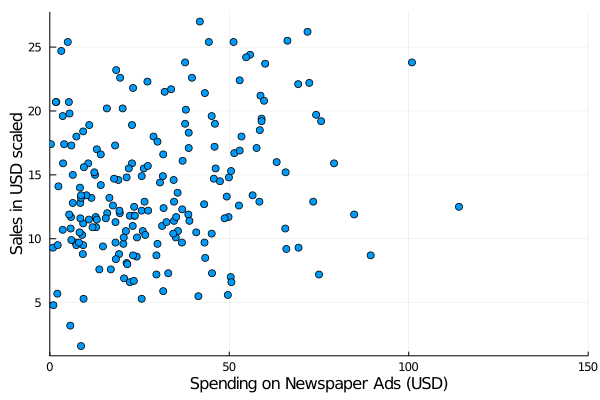

In [11]:
scatter(data_tuples,
    xlim = (0, 150),
    xaxis = "Spending on Newspaper Ads (USD)",
    yaxis = "Sales in USD scaled",
    legend = false)

We want to find the best line, $y=wx+b$, that fits the data set, `Advertising.csv`. Since we have $(x_1, y_1), ..., (x_{200}, y_{200})$, as our data points, we know that our population size (number of data points), $N = 200$.

To do this, we are going to use the Mean Squared Error (MSE) by defining the function

$$ MSE(w,b) = \frac{1}{N} \sum_{i=1}^N (y_i - (w x_i + b))^2 $$

First, we will look at the partial derivatives of the above function with respect to $w$ and with respect to $b$ in order to minimize.


$$\begin{align}
\frac{\partial MSE}{\partial w} &= \frac{-2}{N} \sum_{i=1}^N (y_i - (w x_i + b))(x_i)
\end{align}$$

$$\begin{align}
\frac{\partial MSE}{\partial b} &= \frac{-2}{N} \sum_{i=1}^N (y_i - (w x_i + b))
\end{align}$$

Keep in mind that we want to find $$\min_{x\in\mathbb{R}^n} f(x)$$

As such, to iterate our gradient descent, we must use the following formula

$$
x^{k+1} = x^k - \alpha \nabla f(x^k)
\text{, where } 
\begin{align} x^k =
\begin{bmatrix}
w^k \\
b^k
\end{bmatrix}
\end{align}
$$

or, broken down into partial derivatives, this notebook will use the following formulas which, together, are equivalent to the formula above.

$$w^{k+1} = w^k - \alpha \left( \frac{-2}{N} \sum_{i=1}^N (y_i - (w^k x_i + b^k))(x_i)\right)$$

$$b^{k+1} = b^k - \alpha \left( \frac{-2}{N} \sum_{i=1}^N (y_i - (w^k x_i + b^k))\right)$$

---

### Build the algorithm

To begin implementing the algorithm, we must first calculate the Mean Squared Error which finds the average of how far off our output is from the actual data for accuracy purposes.

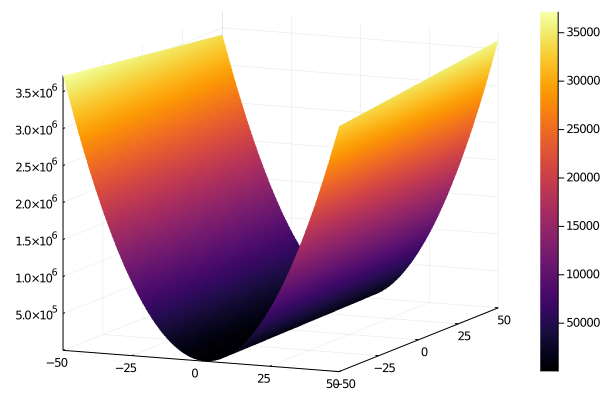

In [12]:
"""
Parameters:
     w:         weight
     b:         bias

Calculates the mean squared error at a given point or set of points.

Returns:
     The mean squared error or cost.
"""
MSE(w, b) = (1/length(x_data))*sum([(y_data[i] - (w*x_data[i] + b))^2 for i = 1:length(x_data)])

w = -50:0.5:50
b = -50:0.5:50

plot(w, b, MSE, st = :surface)

We are minimizing the MSE because we want to find the optimal solution with the minimal average error squared. In short, we are trying to get our values as close to the minimum MSE as possible.

In [13]:
# Iterative Descent function 
"""
Parameters:
     x_data:    x values in the data
     y_data:    y values in the data
     w:         weight
     b:         bias

Calculates the new weight and bias and updates them.

Returns:
    The new weight and bias generated after the derivative change.
"""

function gradient_descent_batch(x_data, y_data, w, b, α)
    N = length(x_data)
    
    w = w - (-2/N)*α*sum([x_data[i]*(y_data[i]-(w*x_data[i] + b)) for i = 1:N])
    b = b - (-2/N)*α*sum([y_data[i]-(w*x_data[i] + b) for i = 1:N])
    
    return w, b
end

gradient_descent_batch (generic function with 1 method)

In [14]:
"""
Parameters:
     x_data:    x values in the data
     y_data:    y values in the data
     w:         weight
     b:         bias

Trains the regression line and displays the cost at 10^n iterations.

Returns:
    The new weight and bias generated.
"""

function training_batch(x_data, y_data, w, b, α, iter)
    j = 0
    for i = 1:iter
        w, b = gradient_descent_batch(x_data, y_data, w, b, α)
        
        if i == 10^j
            println(i, " iteration with cost ", MSE(w, b))
            j = j + 1
        end
    end
        return w, b
end

training_batch (generic function with 1 method)

Our function, `gradient_descent_batch`, takes our data and implements updates on `w` and `b` as each pass is undertaken.
    
While the function, `training_batch`, implements the gradient descent by calculating the gradient and then updating `w` and `b`. As the number of iterations reaches $10^n$, where $n = \text{the number of epochs}$, `iter`, the function displays the number of epochs (passes/iterations) and the cost (calculated by the `MSE(w, b)`) associated with it.

With all of our functions defined, we can now move forward with the implementation of the Gradient Descent Algorithm.

---

### Implement the Algorithm

We will begin with the initial pass of the descent.

1 iteration with cost 104.98360712161686


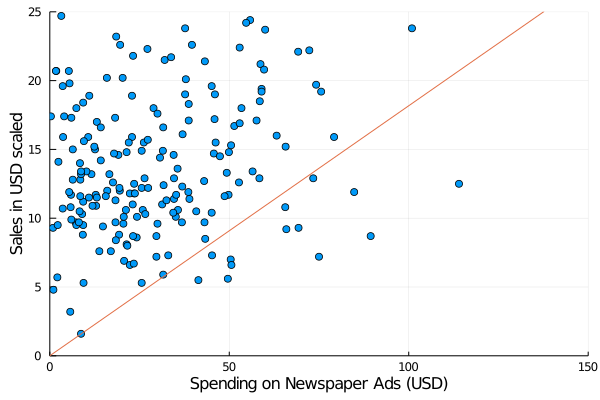

In [15]:
# Initial Pass
w, b = training_batch(x_data, y_data, 0.0, 0.0, 0.0002, 1)

scatter(data_tuples,
    xlim = (0, 150),
    ylim = (0, 25),
    xaxis = "Spending on Newspaper Ads (USD)",
    yaxis = "Sales in USD scaled",
    legend = false)

plot!(x-> x*w + b, 
    xlim = (0, 150), 
    ylim = (0, 25), 
    legend = false)

As it is clear that the first pass did not generate the line of best fit, we will implement $n$ number of passes until our regression line appears to be the most accurate. The regression line will achieve optimum accuracy when the mean squared error is minimized or as close to minimized as possible.

1 iteration with cost 104.98360712161686
10 iteration with cost 76.73722945791737


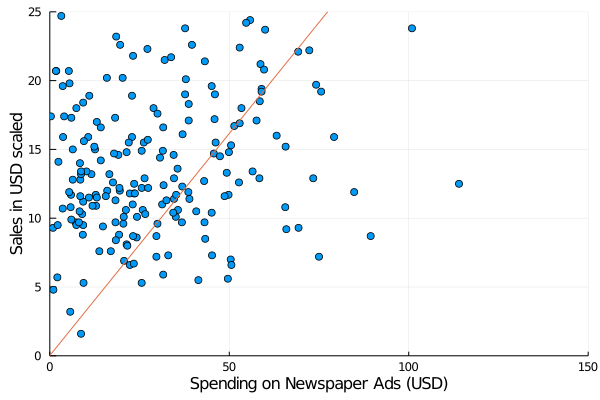

In [16]:
# Pass 2
w, b = training_batch(x_data, y_data, 0.0, 0.0, 0.0002, 10)

scatter(data_tuples,
    xlim = (0, 150),
    ylim = (0, 25),
    xaxis = "Spending on Newspaper Ads (USD)",
    yaxis = "Sales in USD scaled",
    legend = false)

plot!(x-> x*w + b, 
    xlim = (0, 150), 
    ylim = (0, 25), 
    legend = false)

1 iteration with cost 104.98360712161686
10 iteration with cost 76.73722945791737
100 iteration with cost 75.51767882508854


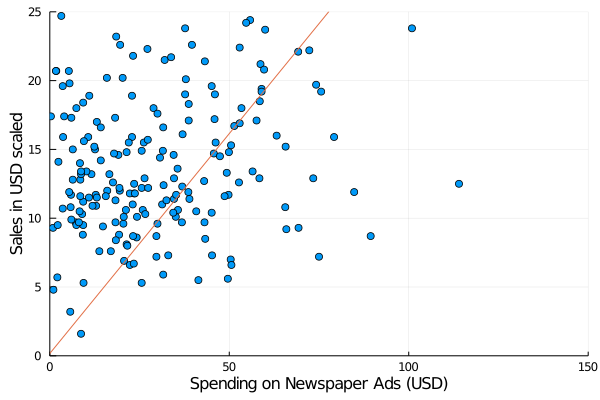

In [17]:
# Pass 3
w, b = training_batch(x_data, y_data, 0.0, 0.0, 0.0002, 100)

scatter(data_tuples,
    xlim = (0, 150),
    ylim = (0, 25),
    xaxis = "Spending on Newspaper Ads (USD)",
    yaxis = "Sales in USD scaled",
    legend = false)

plot!(x-> x*w + b, 
    xlim = (0, 150), 
    ylim = (0, 25), 
    legend = false)

1 iteration with cost 104.98360712161686
10 iteration with cost 76.73722945791737
100 iteration with cost 75.51767882508854
1000 iteration with cost 64.81467569541336


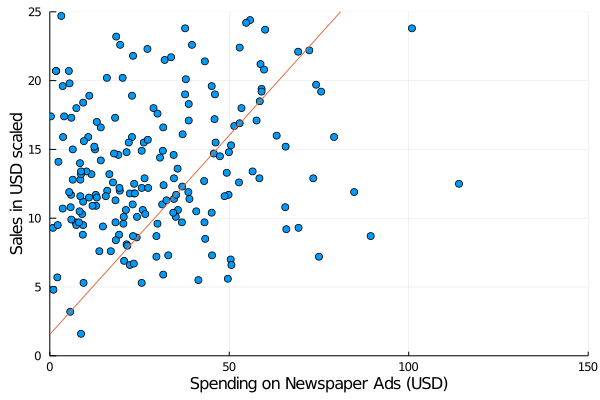

In [18]:
# Pass 4
w, b = training_batch(x_data, y_data, 0.0, 0.0, 0.0002, 1000)

scatter(data_tuples,
    xlim = (0, 150),
    ylim = (0, 25),
    xaxis = "Spending on Newspaper Ads (USD)",
    yaxis = "Sales in USD scaled",
    legend = false)

plot!(x-> x*w + b, 
    xlim = (0, 150), 
    ylim = (0, 25), 
    legend = false)

1 iteration with cost 104.98360712161686
10 iteration with cost 76.73722945791737
100 iteration with cost 75.51767882508854
1000 iteration with cost 64.81467569541336
10000 iteration with cost 29.16389733171309


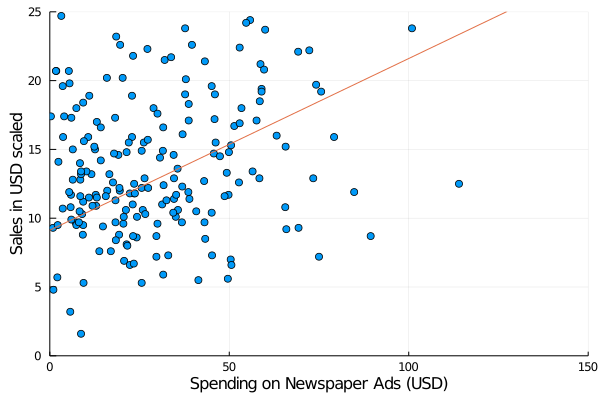

In [19]:
# Pass 5
w, b = training_batch(x_data, y_data, 0.0, 0.0, 0.0002, 10000)

scatter(data_tuples,
    xlim = (0, 150),
    ylim = (0, 25),
    xaxis = "Spending on Newspaper Ads (USD)",
    yaxis = "Sales in USD scaled",
    legend = false)

plot!(x-> x*w + b, 
    xlim = (0, 150), 
    ylim = (0, 25), 
    legend = false)

1 iteration with cost 104.98360712161686
10 iteration with cost 76.73722945791737
100 iteration with cost 75.51767882508854
1000 iteration with cost 64.81467569541336
10000 iteration with cost 29.16389733171309
100000 iteration with cost 25.674022720670525


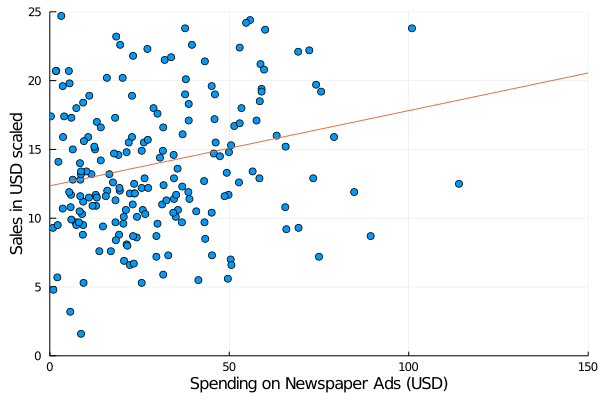

In [20]:
# Pass 6
w, b = training_batch(x_data, y_data, 0.0, 0.0, 0.0002, 100000)

scatter(data_tuples,
    xlim = (0, 150),
    ylim = (0, 25),
    xaxis = "Spending on Newspaper Ads (USD)",
    yaxis = "Sales in USD scaled",
    legend = false)

plot!(x-> x*w + b, 
    xlim = (0, 150), 
    ylim = (0, 25), 
    legend = false)

Although we can continue to generate additional passes until we reach the minimum MSE (or approximately the minimum MSE), for the purpose of this notebook, we are simply displaying the implementation of the algorithm. Please keep in mind that the bigger your $\alpha$ is, the steeper the learning curve. This means that if your learning rate (step size), $\alpha = 0.1$, it may only take one or two passes to finish; likewise, if $\alpha = 0.00001$ five passes may not be enough to find the optimum regression line.

With the above method, we can see how running numerous passes could become tedious; as such, we will introduce a variant of gradient descent called stochastic gradient descent. 

---
---

## Stochastic Gradient Descent: a Gradient Descent Variant

Stochastic Gradient Descent is a method where only one point in the data set, as opposed to all of them, is utilized during the iterations for the descent toward the minimum. In focusing on a single point, we are able to save time when running the algorithm because the computations associated with a large number of points will not be completed. 

![Stochastic Gradient Descent](SGR.png)

In [21]:
# Iterative Descent function for a single point
"""
Parameters:
     x_data:    x values in the data
     y_data:    y values in the data
     w:         weight
     b:         bias

Take a single point and updates the w and b variables.

Returns:
    The new weight and bias generated after the derivative change.
"""

function stochastic_gradient_descent(x_data, y_data, w, b, α)
    N = length(x_data)
    i = rand([k for k = 1:N])
    w = w - (-2/N)*α*(x_data[i]*(y_data[i]-(w*x_data[i] + b)))
    b = b - (-2/N)*α*(y_data[i]-(w*x_data[i] + b))
    
    return w, b
end

stochastic_gradient_descent (generic function with 1 method)

The gradient descent function---now called `stochastic_gradient_descent`---no longer sums all of the data points; instead, it finds the slope, `w`, and intercept, `b` for the single, randomly generated point selected from the data.

In [24]:
"""
Parameters:
     x_data:    x values in the data
     y_data:    y values in the data
     w:         weight
     b:         bias

Trains the regression line and displays the cost at 10^n iterations.

Returns:
    The new weight and bias generated.
"""

function stochastic_training(x_data, y_data, w, b, α, iter)
    j = 0
    for i = 1:iter
        w, b = stochastic_gradient_descent(x_data, y_data, w, b, α)
        
        if i == 10^j
            println(i, " iteration with cost ", MSE(w, b))
            j = j + 1
        end
    end
        return w, b
end

stochastic_training (generic function with 1 method)

As the training function remains, in essence, the same, we implement the stochastic gradient descent as follows:

1 iteration with cost 221.07116476223476
10 iteration with cost 210.3379327307606
100 iteration with cost 153.33440808177306
1000 iteration with cost 77.67239825105709
10000 iteration with cost 76.7370381358695
100000 iteration with cost 70.51103539849166


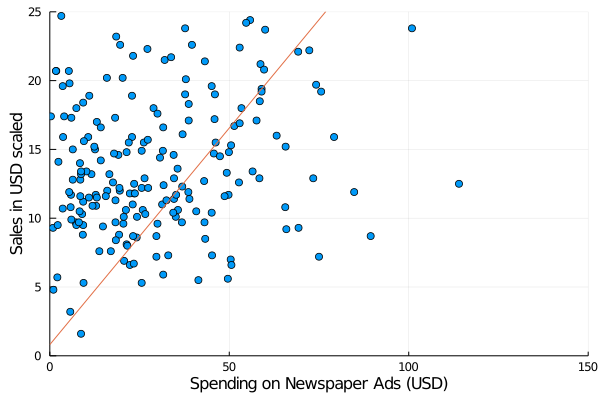

In [25]:
w, b = stochastic_training(x_data, y_data, 0.0, 0.0, 0.0002, 100000)

scatter(data_tuples,
    xlim = (0, 150),
    ylim = (0, 25),
    xaxis = "Spending on Newspaper Ads (USD)",
    yaxis = "Sales in USD scaled",
    legend = false)

plot!(x-> x*w + b, 
    xlim = (0, 150), 
    ylim = (0, 25), 
    legend = false)

## Conclusion

As you can see from the above implementation, the stochastic gradient descent runs faster than the normal gradient descent while managing to share similar results. The normal gradient descent, however, manages to locate a more accurate minimum than the stochastic, a fact that is not always true in the implementation of these two algorithms. 

This allows us to see the benefits in the speed of the Stochastic Gradient Descent while acknowledging that it takes additional epochs to reach the minimum since it only focuses on one point at a time. On the other hand, Gradient Descent takes a longer amount of time to run as it analyzes all of the data points in each epoch; but, it finds the minimum in less iterations than its variant.

---

### For more information on Gradient Descent, see:

+ [Gradient Descent for Machine Learning](https://machinelearningmastery.com/gradient-descent-for-machine-learning/)

+ [Understanding the Mathematics behind Gradient Descent](https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e)

+ [Gradient Descent Algorithm and its Variants](https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3)

---
---